In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import cartopy as cy
import cartopy.crs as ccrs

In [2]:
#b'/home/jovyan/Tjaernoe2022-group5/notebooks/Lea/Tjaernoe2022-group5/notebooks/Lea/20352049_AR_detection.nc'
path = '20852100_AR_detection.nc'
ar8500 = xr.open_dataset(path)

In [3]:
ar8500

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 5840)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 2085-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    ivt      (lat, time, lon) bool ...

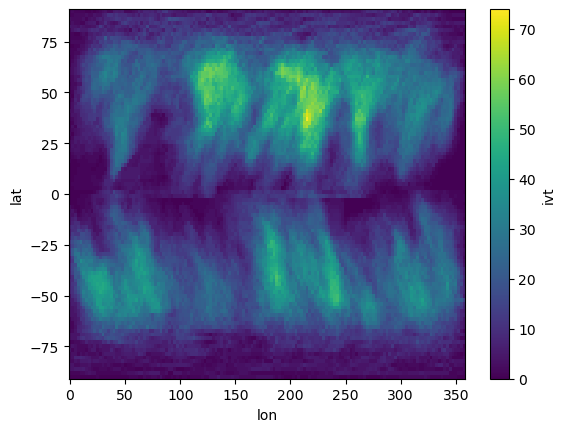

In [4]:
#sum of occurence of atmospheric rivers over the whole year
ar8500['ivt'].sum('time').plot()

In [5]:
sm = ar8500['ivt'].sum('time')
smarc = sm.sel(lat=slice(50,90))
smant = sm.sel(lat=slice(-90,-50))

In [6]:
sm

<xarray.DataArray 'ivt' (lat: 96, lon: 144)>
array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 2, 2, 1],
       [4, 4, 5, ..., 1, 1, 2],
       ...,
       [3, 2, 2, ..., 1, 1, 1],
       [1, 1, 2, ..., 3, 3, 3],
       [1, 2, 1, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


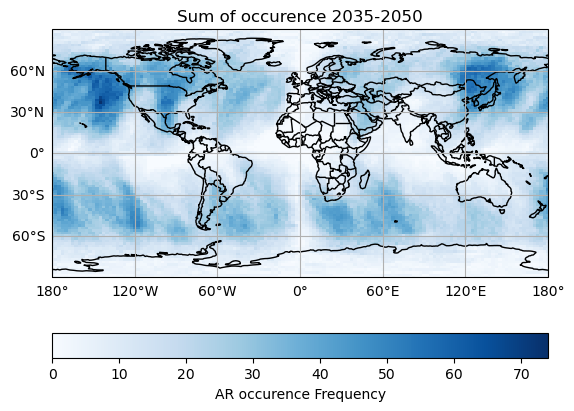

In [7]:
f,ax = plt.subplots(dpi=100,subplot_kw={'projection':ccrs.PlateCarree()})


sm.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    #levels = 6
)
ax.set_title('Sum of occurence 2035-2050')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cy.feature.BORDERS);

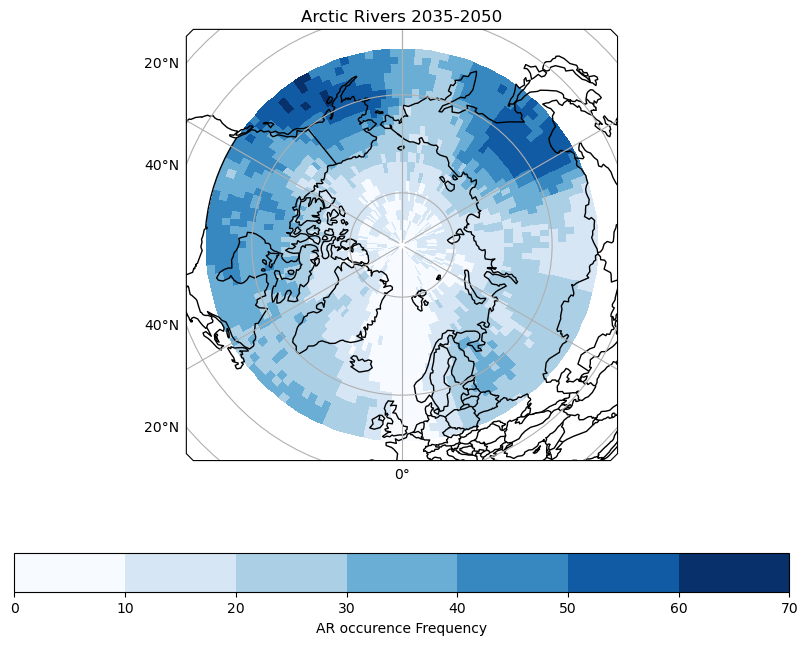

In [8]:

f,ax = plt.subplots(dpi=100, figsize =(10,8),
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=90.0)})
smarc.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 8
)
ax.set_title('Arctic Rivers 2035-2050')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cy.feature.BORDERS);

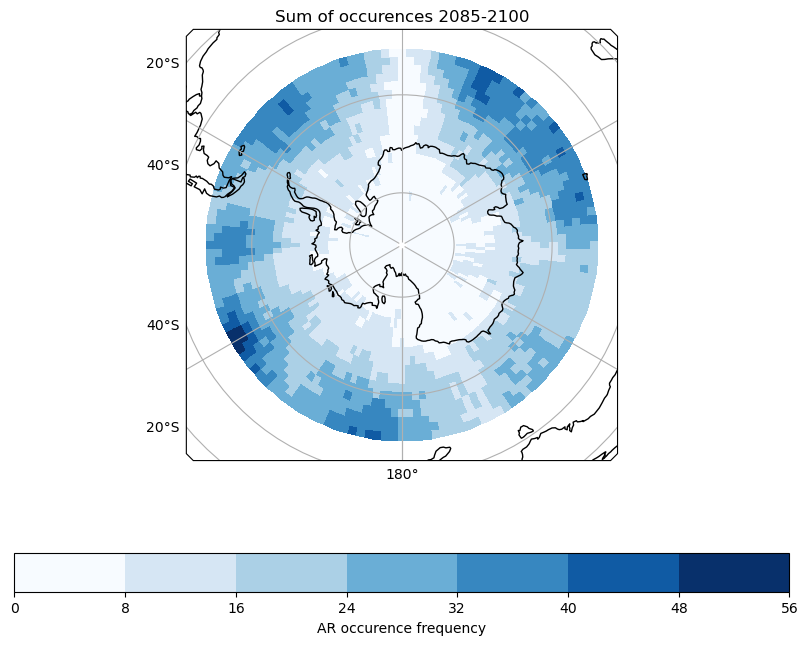

In [10]:
f,ax = plt.subplots(dpi=100, figsize =(10,8),
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90.0)})

smant.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    cbar_kwargs={
        'label':'AR occurence frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 8
)
ax.set_title('Sum of occurences 2085-2100')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cy.feature.BORDERS);